In [29]:
import json
from pathlib import Path
import numpy as np
import pandas as pd
import os

In [30]:
def oob_score(execution_data: dict) -> float:
    if not execution_data['success']:
        return -1
    
    oobs = execution_data['out_of_bounds']
    length = execution_data['length']
    OOBS_RATION_VALUE = 100
    score = (sum(oobs) / length) * OOBS_RATION_VALUE
    return score

In [31]:
def avg_velocity(execution_data: dict) -> float:
    vel_array = execution_data['velocity']

    velocities = [np.linalg.norm(vel) for vel in vel_array]
    return np.mean(velocities)

In [32]:
RESULTS_PATH = Path('results')
osm_results = RESULTS_PATH / 'osm'
ga_results = RESULTS_PATH / 'ga'

In [33]:
def parse_execution_data(data_file: Path):
    with open(data_file, "r") as f:
        x = json.load(f)
    
    return [
        x['name'],
        x['length'],
        x['n_points'],
        x['success'],
        oob_score(x),
        avg_velocity(x),
    ]

In [34]:
df_data = []
for item in osm_results.iterdir():
    if item.suffix == ".json":
        df_data.append(parse_execution_data(item))

In [35]:
df = pd.DataFrame(df_data, 
                  columns=['Name', 'Length', "N Points", "Success", "OOB Score", "AVG Velocity"])

In [43]:
df = df.sort_values("OOB Score")
df.tail()

,Name,Length,N Points,Success,OOB Score,AVG Velocity
23,Elder Grove,111.272756,4,True,7.340583,9.653168
62,St Pancras Close,83.863936,8,True,8.393022,4.279212
56,Scarfield Close,95.130916,8,True,8.780162,5.627918
24,Fieldhead Road,156.762769,12,True,11.324785,11.253184
59,Shephard's Close,130.716526,4,True,21.665879,10.324787


In [44]:
df_data = []
for item in ga_results.iterdir():
    if item.suffix == ".json":
        df_data.append(parse_execution_data(item))

df = pd.DataFrame(df_data, 
                  columns=['Name', 'Length', "N Points", "Success", "OOB Score", "AVG Velocity"])

<AxesSubplot:xlabel='index'>

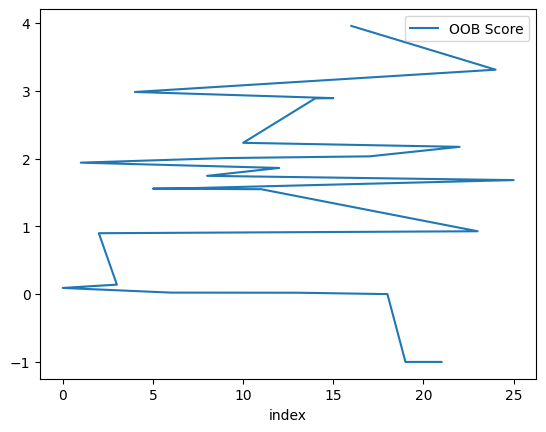

In [56]:
# df = df.sort_values("OOB Score")
df.reset_index().plot(x='index', y='OOB Score')
